In [1]:
################################
# Scientific imports
################################
import gc
import matplotlib.pyplot as plt
import numpy as np
import fnmatch

################################
# General imports
################################
import csv, math, io, os, os.path, sys, random, time, json
import pandas as pd
import seaborn as sb
from tqdm.notebook import tqdm, trange

################################
# SciKitLearn Imports
################################
import sklearn
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import make_scorer

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from IPython.display import display

################################
# MatPlotLib Settings
################################
plt.rcParams["figure.figsize"] = (5,5)
sb.set()

################################
# Initialisers
################################
masterX = np.load("True_NOO_fluxes.npy")
masterY = np.load("True_NOO_isplanetlist.npy")

In [2]:
################################
# Functions
################################
def MakeMatrix(TN, FP, FN, TP):
    Matrix = [[0 for x in range(2)] for y in range(2)]
    Matrix[0][0] = TN
    Matrix[0][1] = FP
    Matrix[1][0] = FN
    Matrix[1][1] = TP
    return(Matrix)

def PlotConfusionMatrix(mat, title):
    
    confMat = sb.heatmap(mat, square=True, annot=True, fmt='d', cbar=False, cmap="rocket",
            xticklabels=['Negative','Positive'],
            yticklabels=['Negative','Positive'],
            annot_kws={"size": 20})
    
    confMat.set_xticklabels(confMat.get_xmajorticklabels(), fontsize = 14)
    confMat.set_yticklabels(confMat.get_ymajorticklabels(), fontsize = 14)
    
    plt.rcParams["figure.figsize"] = (5,5)
    sb.set(font_scale=1.3)
    
    fig = confMat.get_figure() 
    plt.xlabel('Actual Value', fontsize=16, labelpad=10)
    plt.ylabel('Predicted Value', fontsize=16, labelpad=10)
    
    titleText = "Confusion Matrix: "+title
    
    plt.title(titleText)
    
    #plt.show()
    
    targetdest="./confusionmatrices/"
    #plt.savefig(targetdest+"PCA_SVM_Matrix.png")
    plt.savefig("{}ConfusionMatrix_{}.png".format(targetdest,title))

In [3]:
jsonlist = []
files = os.listdir('./NEW_RESULTS/')
for file in files:
    if file.endswith(".json"):
        jsonlist.append(file)
jsonlist.sort()
keylist = []

for jsonfile in jsonlist: 
    with open("./NEW_RESULTS/"+jsonfile, "r") as f:
        data = json.load(f)[jsonfile.split(".json")[0]]
        acc = data[0]['Accuracy']
        pre = data[0]['Precision']
        rec = data[0]['Recall']
        
        keylist.append({jsonfile: 
                                {
                                    'acc': acc,
                                    'pre': pre,
                                    'rec': rec
                                }
                       }
                      )

vallist=[]

full_jsonlist = jsonlist.extend(['Always Yes', 'Always No', 'Random'])

for i in range(len(keylist)):
    q = keylist[i].values()
    #print(q)
    for j in q:
        #print(j)
        vallist.append(j)


#[[keys.keys() for keys in jsonfile.values()] for jsonfile in keylist][0][0]

#algolist=['K-Nearest\nNeighbour', 'Gaussian\nNaive\nBayes', 'Random\nDecision\nTree', 'Support\nVector\nMachine', 'Always\nPredicts\nPositive', 'Always\nPredicts\nNegative', 'Random']

X_train, X_test, y_train, y_test = train_test_split(masterX, masterY, random_state=42)

y_pred = np.array([round(random.uniform(0, 1)) for x in y_test])
yes_y_pred = np.array([1 for x in y_pred])
no_y_pred = np.array([0 for x in y_pred])
    
rnd_acc = accuracy_score(y_test, y_pred)
rnd_pre = precision_score(y_test, y_pred)
rnd_rec = recall_score(y_test, y_pred)

#print(f"{rnd_acc}\n{rnd_pre}\n{rnd_rec}")

pred_yes = {'acc': accuracy_score(y_test, yes_y_pred), 'pre': precision_score(y_test, yes_y_pred), 'rec': recall_score(y_test, yes_y_pred)}
pred_no =  {'acc': accuracy_score(y_test, no_y_pred), 'pre': precision_score(y_test, no_y_pred), 'rec': recall_score(y_test, no_y_pred)}
pred_rnd = {'acc': 0.5044642857142857, 'pre': 0.1482213438735178, 'rec': 0.5226480836236934}

full_vallist = vallist.extend([pred_yes, pred_no, pred_rnd])

vallist, jsonlist

/home/jdowzell/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


([{'acc': 0.7321428571428571,
   'pre': 0.27845884413309985,
   'rec': 0.554006968641115},
  {'acc': 0.21577380952380953,
   'pre': 0.14989177489177488,
   'rec': 0.9651567944250871},
  {'acc': 0.8854166666666666, 'pre': 0.9, 'rec': 0.21951219512195122},
  {'acc': 0.8576388888888888, 'pre': 0.0, 'rec': 0.0},
  {'acc': 0.8630952380952381,
   'pre': 0.7037037037037037,
   'rec': 0.06620209059233449},
  {'acc': 0.8000992063492064,
   'pre': 0.28832116788321166,
   'rec': 0.27526132404181186},
  {'acc': 0.810515873015873,
   'pre': 0.3356401384083045,
   'rec': 0.33797909407665505},
  {'acc': 0.8893849206349206,
   'pre': 0.7666666666666667,
   'rec': 0.3205574912891986},
  {'acc': 0.8888888888888888,
   'pre': 0.8795180722891566,
   'rec': 0.25435540069686413},
  {'acc': 0.8958333333333334,
   'pre': 0.7938931297709924,
   'rec': 0.3623693379790941},
  {'acc': 0.8695436507936508,
   'pre': 0.5705882352941176,
   'rec': 0.33797909407665505},
  {'acc': 0.1423611111111111, 'pre': 0.142361111

In [5]:
algolist = ['SKLearn:\nK-Nearest\nNeighbour', 'SKLearn:\nGaussian\nNaive-Bayes', 'SKLearn:\nRandom\nDecision Tree', 'SKLearn:\nSupport Vector\nMachine', 
            'ContractibleBOSS', 'IndividualBOSS', 'IndividualTDE', 'MUSE', 'Random Interval\nSpectral Forest', 'Supervised Time\nSeries Forest', 'WEASEL',
            'Always Predicts\nPositive', 'Always Predicts\nNegative', 'Random']

df = pd.DataFrame(vallist, index=algolist, columns=[[keys.keys() for keys in jsonfile.values()] for jsonfile in keylist][0][0])
df = df.rename(columns={"acc": "Accuracy", "pre": "Precision", "rec": "Recall"})
df

,Accuracy,Precision,Recall
SKLearn:\nK-Nearest\nNeighbour,0.732143,0.278459,0.554007
SKLearn:\nGaussian\nNaive-Bayes,0.215774,0.149892,0.965157
SKLearn:\nRandom\nDecision Tree,0.885417,0.900000,0.219512
SKLearn:\nSupport Vector\nMachine,0.857639,0.000000,0.000000
ContractibleBOSS,0.863095,0.703704,0.066202
IndividualBOSS,0.800099,0.288321,0.275261
IndividualTDE,0.810516,0.335640,0.337979
MUSE,0.889385,0.766667,0.320557
Random Interval\nSpectral Forest,0.888889,0.879518,0.254355
Supervised Time\nSeries Forest,0.895833,0.793893,0.362369


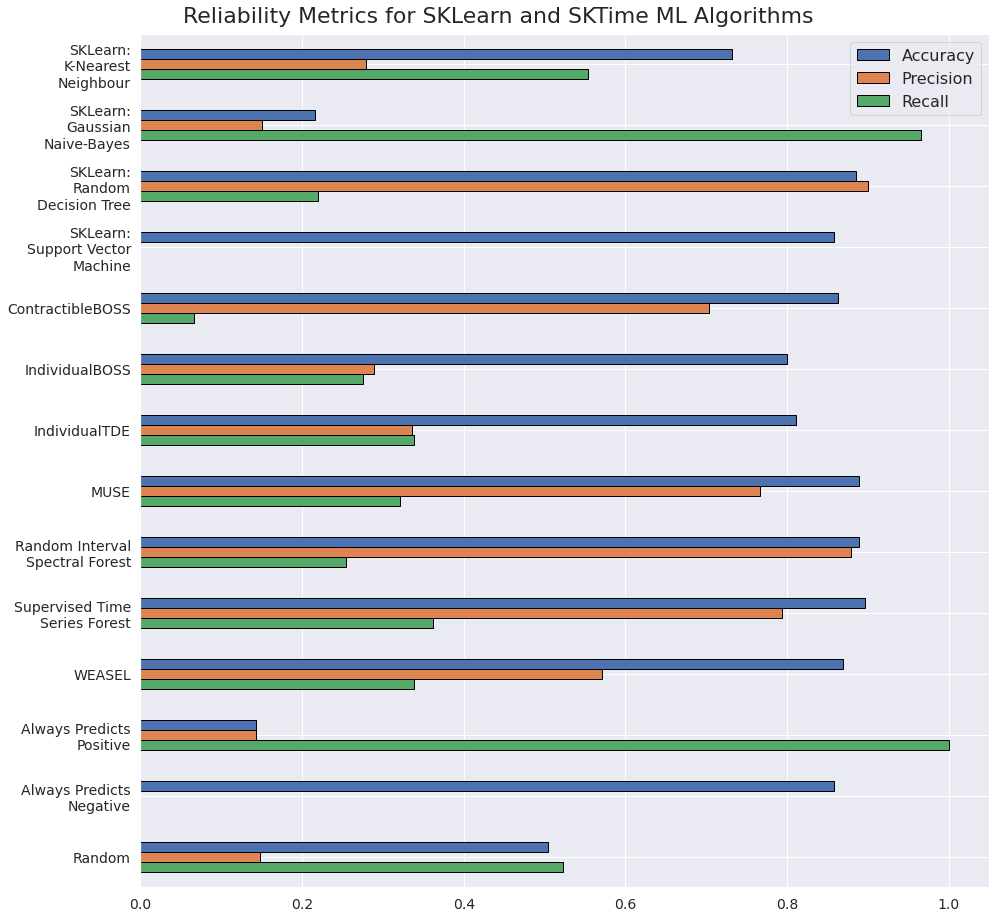

In [6]:
plt.rcParams["figure.figsize"] = (14,13)

fig = df.plot.barh(rot=0, ylim=[0,1], fontsize=14, width = 0.5, linewidth=1, edgecolor='black')
plt.gcf().suptitle("Reliability Metrics for SKLearn and SKTime ML Algorithms",fontsize=22)
plt.gca().invert_yaxis()

fig.legend(loc=0, prop={'size': 16})

plt.tight_layout()
fig.figure.savefig("./img/SKLearn_Metrics_BETTER.png")

plt.rcParams["figure.figsize"] = (10,6)